# Mountain Lee Waves
Jacob Hinson and Maddie Richardson

## Introduction

Lee waves are produced due to orographic lifting and form downwind of mountains. This means that when air flow hits a mountain, it is forced to rise over the mountain, and this triggers perturbations downstream from the mountain. Lee waves can be responsible for forming lenticular clouds, which are unique stationary clouds, and form when moisture condenses at the crests of lee waves. It is important to understand lee wave formation and propagation because they can be dangerous for aircraft because they can cause clear-air-turbulence. They can also lead to extremely strong winds on the lee side of mountains, also known as downslope winds, that can be dangerous to fly through or can damage structures.  

In our project, we are focusing on linear mountain-wave theory which assumes that the mountain is small compared to the vertical wavelength of the lee wave formed. There are other ways to model mountain waves using nonlinear theory, but for the purpose of this class, linear was chosen given time limitations. We chose to use the Crank-Nicholson scheme to approximate solutions for our waves given our chosen initial conditions. Our initial condition at the surface is h, which is the topography of the mountain range at the surface. We assume that we are observing a sinusoidal mountain range. Our upper boundary was chosen based on the decreasing density of the atmosphere with height. The troposphere is the only portion of the atmosphere where weather occurs, and it only reaches 9km from the surface at 50°N/S, so we assumed our top boundary would be 9km seeing as lee waves would not propagate past this point. This differs from other models as they use z→∞ as a boundary. We chose to assume that perturbation energy goes to zero as z approaches 9km.


## Equations

2-D Boussinesq flow theory was used to model lee wave formation for this project. This approximation is based on buoyancy and the incompressibility of air. The fluid, or air in this case, abides by conservation of mass, conservation of momentum and the conservation of energy. Considering all this, the final linear mountain-wave theory equation modeled in this project is:

## $$ \frac{\partial^2w}{\partial x^2} + \frac{\partial^2w}{\partial z^2} + \ell^2 w= 0$$
Where w is the vertical velocity of air.

## Numerical Methods

We used the Crank Nicholson finite differencing method, which is a blend of forward and backward euler, to solve our PDE. We used a dirichlet boundary conditions given that they were provided in the sources we used. The Crank Nicholson method is unconditionally stable for all values of C_d, or the diffusion number. We chose to use it because it tends to be more accurate than the backward euler method.  


In [434]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

### Define Boundaries

In [435]:
dx = 1
xf = 100
x = np.arange(0, xf+1, dx)
#print(x)

dz = 1
zf = 9
z = np.arange(0, zf+1, dz)
#print(z)

### Energy Dissipation with Height

1010


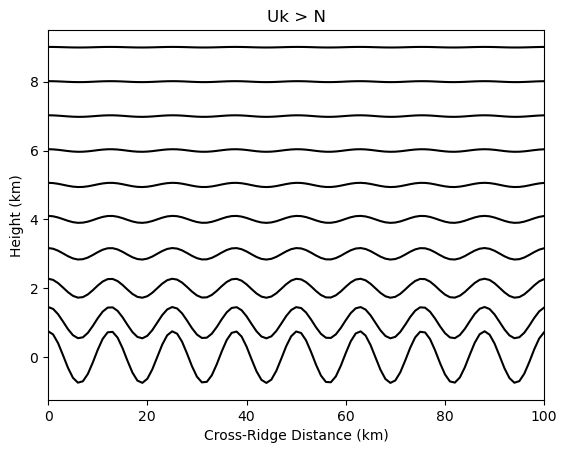

In [436]:
U = 15 #m/s^2
N = 0.01 #1/s
l = N / U
k = 0.5 #smaller is wavier
mu = np.sqrt(k**2 - l**2)

h0 = 0.1

# The vertical velocity satisfying (1) and the upper and lower boundary conditions is:
def omega(x, z):
    return U * h0 * k * np.exp(-mu*z) * np.cos(k*x)

omegalist = []
for i in np.arange(len(z)):
    zz = z[i]
    #print(f'Z -------- Calculating at {zz/1000:0.2}km height')
    for j in np.arange(len(x)):
        xx = x[j]
        #print(f'X -- Calculating for x distance of {xx/1000:0.3}km')
        #print(f'For z={zz/1000}km and x={xx/1000}km')
        #print(f'Omega is {omega(xx, zz):0.4}')
        omegalist.append(omega(xx, zz)+z[i])
print(len(omegalist))
def plot(dz):
    if dz == 1000:
        plt.plot(x, omegalist[:101], c='black')     # Ground
        plt.plot(x, omegalist[101:202], c='black')  # 1km
        plt.plot(x, omegalist[202:303], c='black')  # 2km
        plt.plot(x, omegalist[303:404], c='black')  # 3km
        plt.plot(x, omegalist[404:505], c='black')  # 4km
        plt.plot(x, omegalist[505:606], c='black')  # 5km
        plt.plot(x, omegalist[606:707], c='black')  # 6km
        plt.plot(x, omegalist[707:808], c='black')  # 7km
        plt.plot(x, omegalist[808:909], c='black')  # 8km
        plt.plot(x, omegalist[909:1010], c='black')  # 9km
        
        plt.title('Uk > N')
        plt.xlabel('Cross-Ridge Distance (km)')
        plt.ylabel('Height (km)')
        plt.margins(x=0)
        

    elif dz == 500:
        plt.plot(x, omegalist[:201], c='black')
        plt.plot(x, omegalist[201:402], c='black')
        plt.plot(x, omegalist[402:603], c='black')
        plt.plot(x, omegalist[603:804], c='black')
        plt.plot(x, omegalist[804:1005], c='black')
        plt.plot(x, omegalist[1005:1206], c='black')
    else:
        print('Not Valid Input')
        
        
plot(1000)

### Energy Propagation Upstream

4.444444444444445e-07


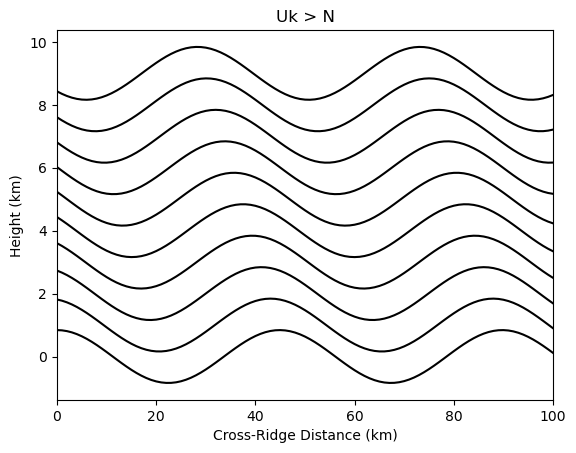

In [437]:
U = 15 #m/s^2
N = 0.01 #1/s
l2 = N**2 / U**2
print(l2)
k = 0.0014 # controls wavelength
v = (l - k**2)**(1/2)

h0 = 40

# The vertical velocity satisfying (1) and the upper and lower boundary conditions is:
def omega7(x, z):
    return U * h0 * k * np.cos(k*x*100 + v*z*10)

omegalist = []
for i in np.arange(len(z)):
    zz = z[i]
    #print(f'Z -------- Calculating at {zz/1000:0.2}km height')
    for j in np.arange(len(x)):
        xx = x[j]
        #print(f'X -- Calculating for x distance of {xx/1000:0.3}km')
        #print(f'For z={zz/1000}km and x={xx/1000}km')
        #print(f'Omega is {omega(xx, zz):0.4}')
        omegalist.append(omega7(xx, zz)+z[i])
        
plot(1000)

# Work in Progress for Solving Through Equation

Unsure if this is a valid way to solve this ODE. It looks like we're just diffusing the initial condition upwards. There seems to be no control over the Uk < N or Uk > N factors to determine if it will slant or not.

In [439]:
dx = 1
xf = 100
x = np.arange(0, xf+1, dx)
#print(x)

dz = 1
zf = 9
z = np.arange(0, zf+1, dz)
n = int(zf/dz)
#print(z)

D = 1.5
C_d = (D * dx) / (dz**2)

In [440]:
data1 = np.array([-0.5*C_d*np.ones(n), (1 + C_d)*np.ones(n), -0.5*C_d*np.ones(n)])
diagsM1 = np.array([-1, 0, 1])
M1 = spdiags(data1, diagsM1, n-1, n-1).toarray()

data2 = np.array([0.5*C_d*np.ones(n), (1 - C_d)*np.ones(n), 0.5*C_d*np.ones(n)])
diagsM2 = np.array([-1, 0, 1])
M2 = spdiags(data2, diagsM2, n-1, n-1).toarray()

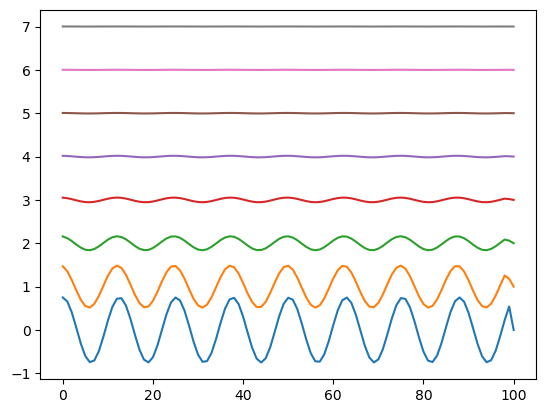

In [441]:
dx = 1
xf = 100
x = np.arange(0, xf+1, dx)
#print(x)

dz = 1
zf = 9
z = np.arange(0, zf+1, dz)
n = int(zf/dz)
#print(z)

D = 1.5
C_d = (D * dx) / (dz**2)

data1 = np.array([-0.5*C_d*np.ones(n), (1 + C_d)*np.ones(n), -0.5*C_d*np.ones(n)])
diagsM1 = np.array([-1, 0, 1])
M1 = spdiags(data1, diagsM1, n-1, n-1).toarray()

data2 = np.array([0.5*C_d*np.ones(n), (1 - C_d)*np.ones(n), 0.5*C_d*np.ones(n)])
diagsM2 = np.array([-1, 0, 1])
M2 = spdiags(data2, diagsM2, n-1, n-1).toarray()

h0 = 0.1
k = 0.5
U = 15

surfaceM = np.zeros(len(x))

for i in np.arange(0, xf, dx):
    surfaceM[i] = (U * h0 * k * np.cos(k*x[i])) + z[0]
    
topM = np.zeros(len(x))

middleM = np.zeros([n-1, len(x)])

W = np.zeros([n-1, len(x)])
W[0, :] = surfaceM
W[-1, :] = topM

for k in np.arange(0, len(x)-1, 1):                                                        # maybe k+1
    middleM[:, k] = np.linalg.inv(M1) @ ((M2 @ middleM[:, k]) + 0.5*W[:, k]*C_d + 0.5*W[:, k+1]*C_d)
    
finalM = np.zeros([n, len(x)])
#print(middleM)

finalM[0, :] = surfaceM
finalM[1:, :] = middleM
finalM[-1, :] = topM

for e in np.arange(0, zf-1, 1):
    finalM[e, :] = finalM[e, :] + z[e]
    
for c in range(0,8):
    plt.plot(x, finalM[c, :])
plt.show()

My (bad) attempt at hand solving the equation. This really shouldn't be referenced or used, I tried to get the for loop to work but something makes it unstable. I don't wan't to debug it tbh

(8, 101)


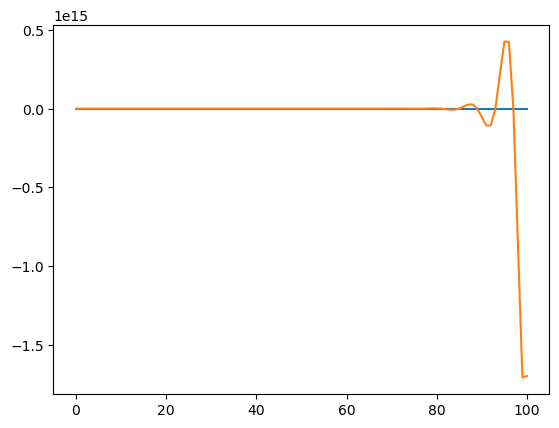

In [442]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

dx = 1
xf = 100
x = np.arange(0, xf+1, dx)

dz = 1
zf = 9
z = np.arange(0, zf+1, dz)
n = int(zf/dz)

h0 = 0.5
k = 0.1
U = 15
N = 0.01
l2 = N**2 / U**2

surfaceBC = (U * h0 * k * np.cos(k * x)) + z[0]
    
topBC = np.zeros(len(x))

w = np.zeros([n-1, len(x)])
print(np.shape(w))
w[0, :] = surfaceBC 
w[-1, :] = topBC

denom = (1/(dx)**2) + (1/(dz)**2)

for i in np.arange(1, 8, 1): # z pos
    for j in np.arange(0, 100, 1): # x pos
        w[i, j+1] = ((( 2*(denom)) + (l2) ) / (1/(dz**2))) * ((w[i, j]/2) - (w[i-1, j]/(2*(dx**2))) + (w[i, j+1]/(2*(dz**2))) - (w[i, j-1]/(2*(dx**2))))
        
plt.plot(x, w[0, :])
plt.plot(x, w[1, :])

# Solving (Uk > N) the proper way

7.5 0.01
0


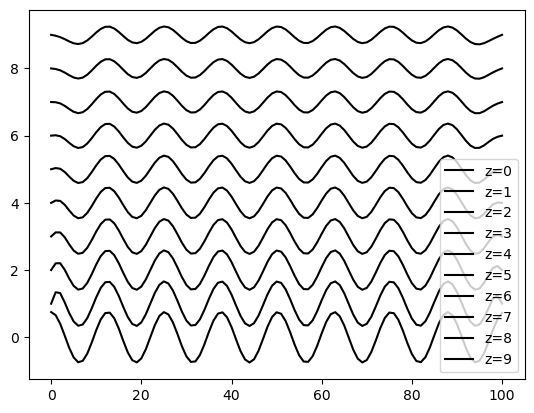

In [443]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt

# Parameters
dx = 1
xf = 100
x = np.arange(0, xf + dx, dx)

dz = 1
zf = 10
z = np.arange(0, zf + dz, dz)
n = len(z)

h0 = 0.1
k = 0.5
U = 15
N = 0.01
print(U*k, N)

l2 = N**2 / U**2

# Initial and boundary conditions
surfaceBC = (U * h0 * k * np.cos(k * x)) + z[0]
#a = 10
#surfaceBC = (h0*(a**2))/(x**2 + a**2)
print
topBC = np.zeros(len(x))

w = np.zeros([n+1, len(x)])
w[0, :] = surfaceBC
w[-1, :] = topBC

# Coefficient calculations
alpha = dz**2 / (4 * dx**2)
beta = dx**2 / (4 * dz**2)

# Iterative solution using finite difference
for i in range(1, n-1):
    A_coeff = [-alpha * np.ones(xf - 1), 1 + 2 * alpha + l2, -alpha * np.ones(xf - 1)]
    A = diags(A_coeff, [-1, 0, 1], shape=(xf - 1, xf - 1))

    B_coeff = [beta * np.ones(xf - 1), 1 - 2 * beta - l2, beta * np.ones(xf - 1)]
    B = diags(B_coeff, [-1, 0, 1], shape=(xf - 1, xf - 1))

    w[i, 1:xf] = np.linalg.solve(A.toarray(), np.dot(B.toarray(), w[i-1, 1:xf]))
print(z[0])
# Adding additional terms
for e in range(0, zf):
    w[e, :] += z[e]

# Plot the results
for i in range(n-1):
    plt.plot(x, w[i, :], label=f'z={i}', color='black')

plt.legend()
plt.show()

## I asked ChatGPT to put the above code into Crank-Nicholson instead of Finite Differences and it gave this much better result lol

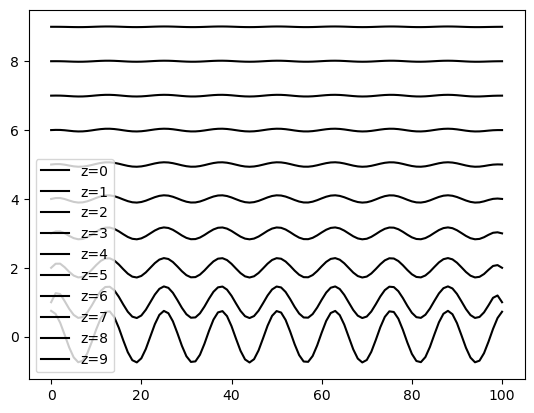

In [444]:
import numpy as np
from scipy.sparse import diags, eye, csc_matrix
import matplotlib.pyplot as plt

# Parameters
dx = 1
xf = 100
x = np.arange(0, xf + dx, dx)

dz = 1
zf = 10
z = np.arange(0, zf + dz, dz)
n = len(z)

h0 = 0.1
k = 0.5
U = 15
N = 0.01

l2 = N**2 / U**2

# Initial and boundary conditions
surfaceBC = (U * h0 * k * np.cos(k * x)) + z[0]
topBC = np.zeros(len(x))

w = np.zeros([n+1, len(x)])
w[0, :] = surfaceBC
w[-1, :] = topBC

# Coefficient calculations
alpha = dz**2 / (4 * dx**2)
beta = dx**2 / (4 * dz**2)

# Crank-Nicolson coefficients
C1 = -alpha * np.ones(xf - 1)
C2 = 1 + 2 * alpha + l2
C3 = -alpha * np.ones(xf - 1)

D1 = beta * np.ones(xf - 1)
D2 = 1 - 2 * beta - l2
D3 = beta * np.ones(xf - 1)

# Constructing the matrices
A = diags([C1, C2, C3], [-1, 0, 1], shape=(xf - 1, xf - 1))
B = diags([D1, D2, D3], [-1, 0, 1], shape=(xf - 1, xf - 1))

I = eye(xf - 1)

# Time-stepping using Crank-Nicolson
for i in range(1, n):
    rhs = (I - 0.5 * A) @ w[i-1, 1:xf] + 0.5 * B @ w[i-1, 1:xf]
    w[i, 1:xf] = np.linalg.solve((I + 0.5 * A).toarray(), rhs)

# Adding additional terms
for e in range(0, zf):
    w[e, :] += z[e]

# Plot the results
for i in range(n-1):
    plt.plot(x, w[i, :], label=f'z={i}', color='black')

plt.legend()
plt.show()

# Solving (Uk < N) the proper way
Note that this isn't working right yet, and I don't really know why. I've double checked the numerical implementation and I've even asked ChatGPT to help me debug it and nothing will work.

0.15 0.01
4.444444444444445e-07 0.0


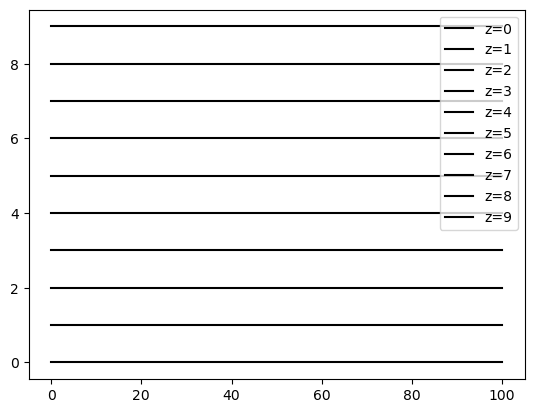

4.444444444444445e-07 0.01


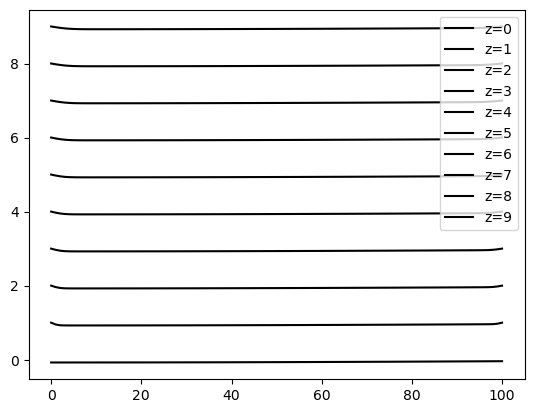

4.444444444444445e-07 0.02


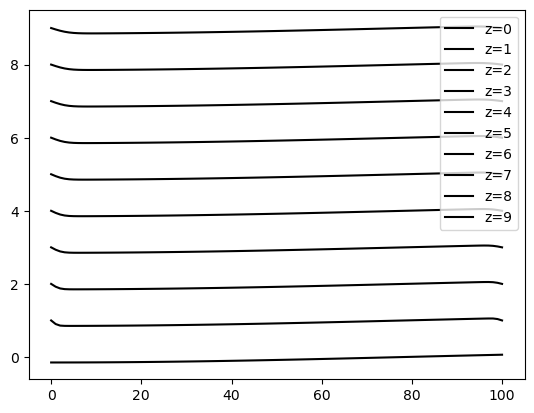

4.444444444444445e-07 0.03


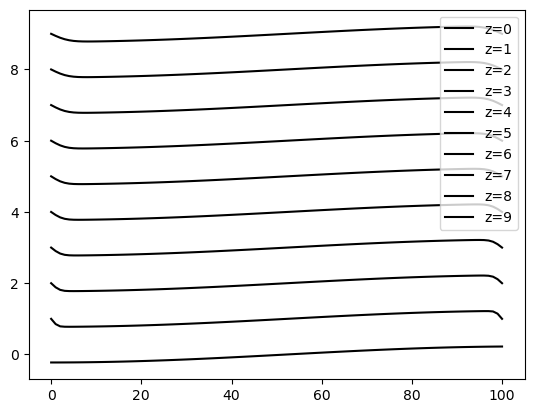

4.444444444444445e-07 0.04


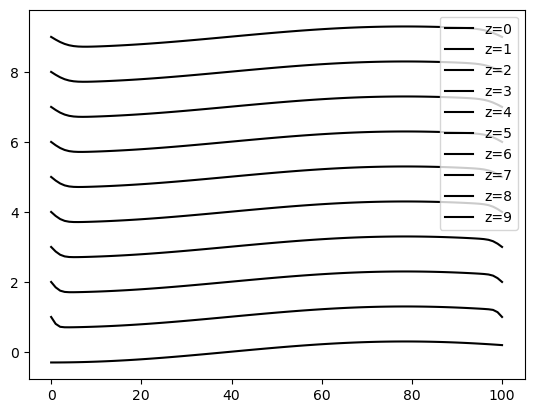

4.444444444444445e-07 0.05


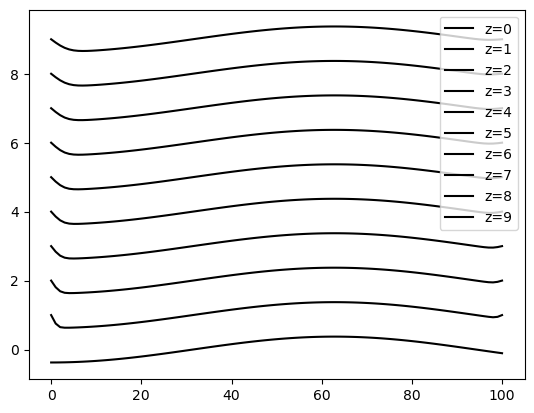

4.444444444444445e-07 0.06


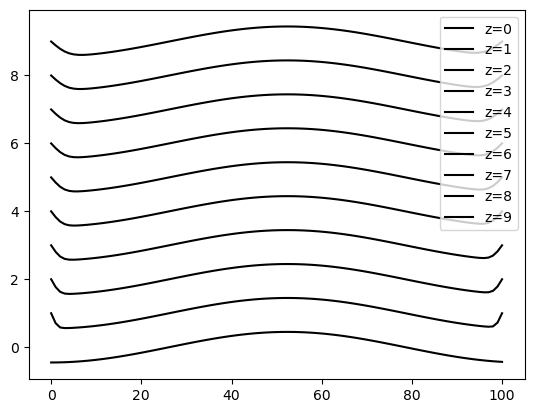

4.444444444444445e-07 0.07


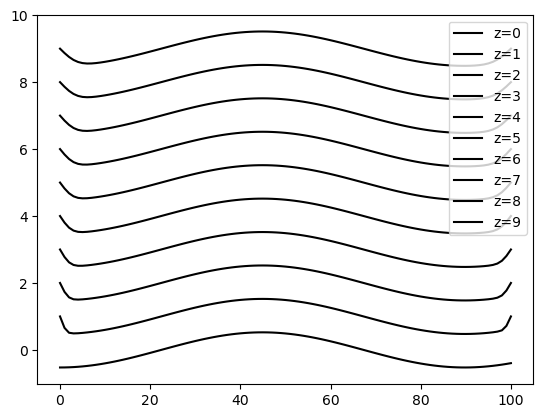

4.444444444444445e-07 0.08


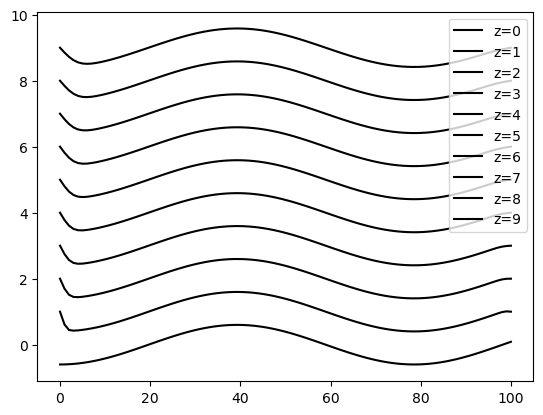

4.444444444444445e-07 0.09


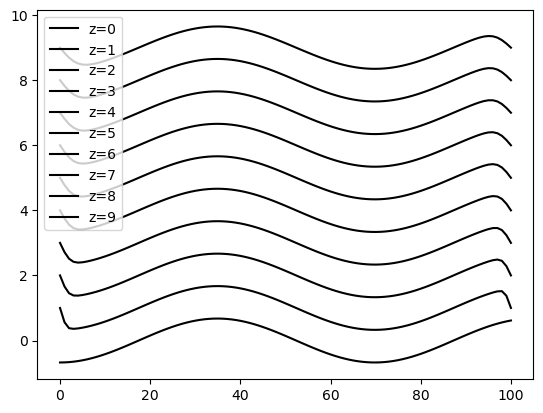

4.444444444444445e-07 0.1


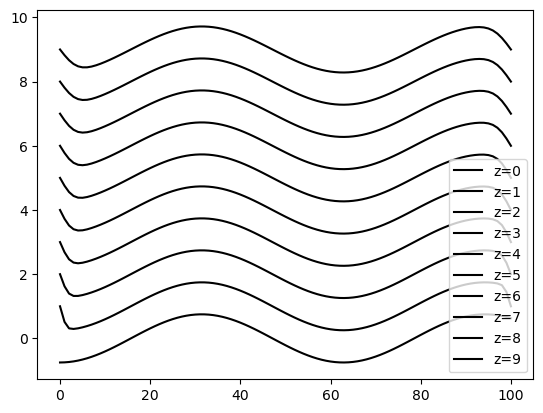

4.444444444444445e-07 0.11


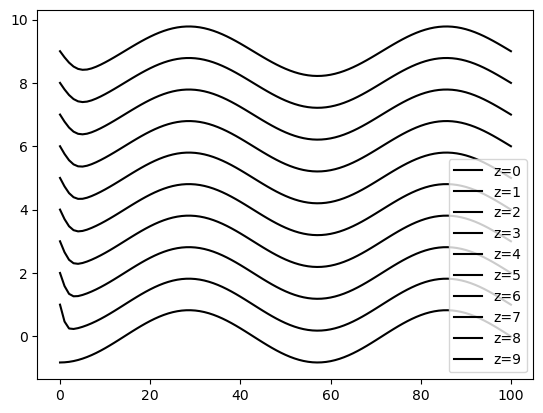

4.444444444444445e-07 0.12


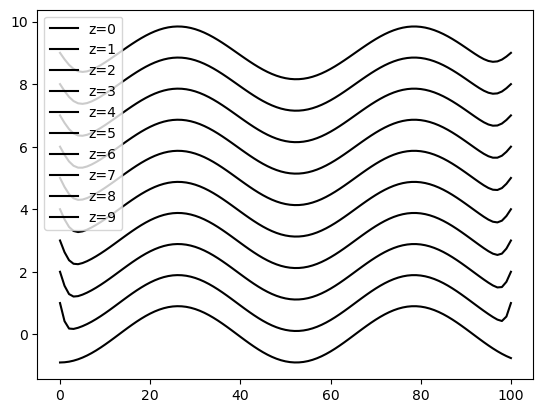

4.444444444444445e-07 0.13


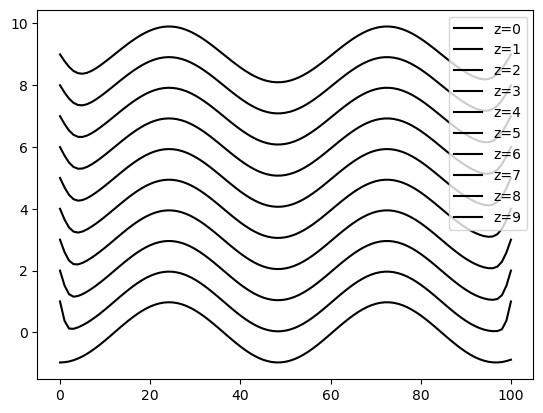

4.444444444444445e-07 0.14


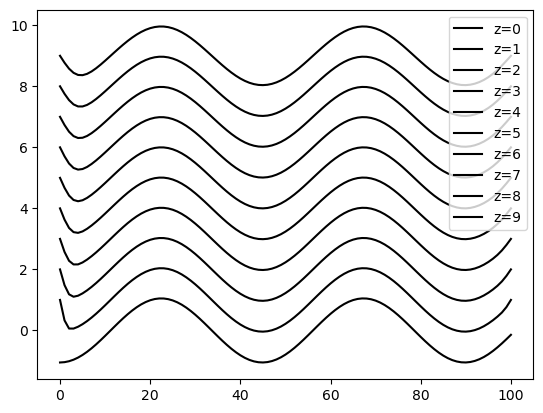

4.444444444444445e-07 0.15


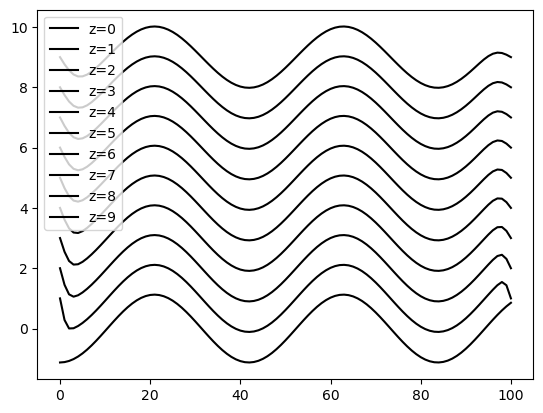

4.444444444444445e-07 0.16


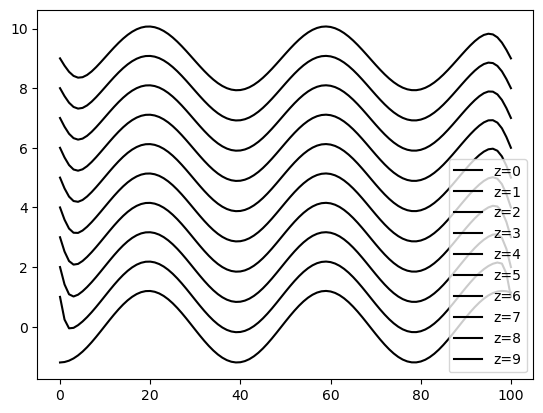

4.444444444444445e-07 0.17


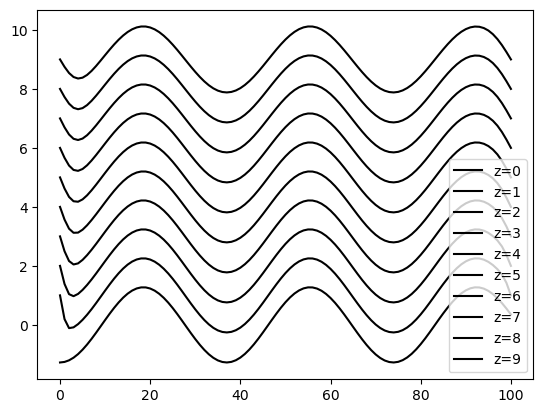

4.444444444444445e-07 0.18


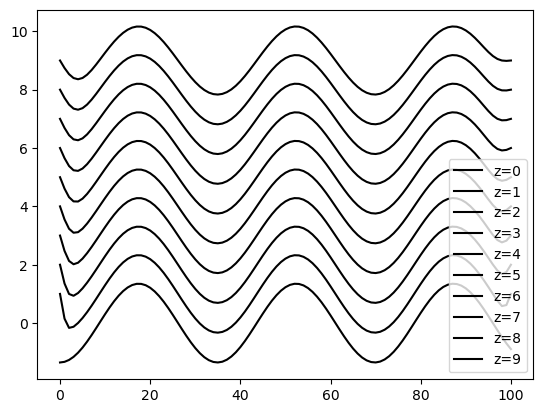

4.444444444444445e-07 0.19


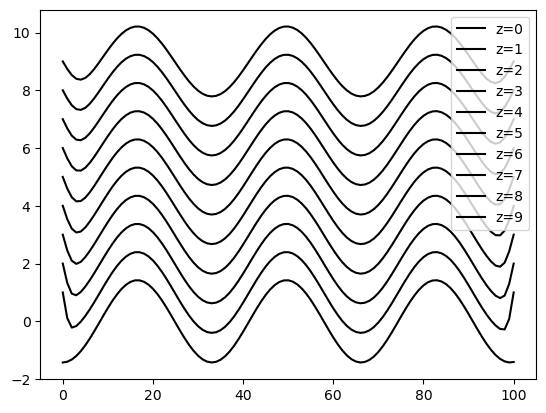

4.444444444444445e-07 0.2


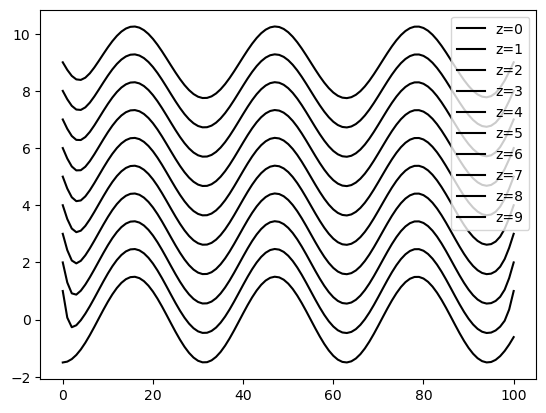

4.444444444444445e-07 0.21


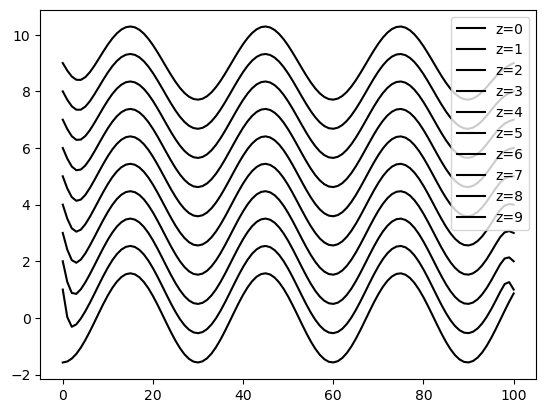

4.444444444444445e-07 0.22


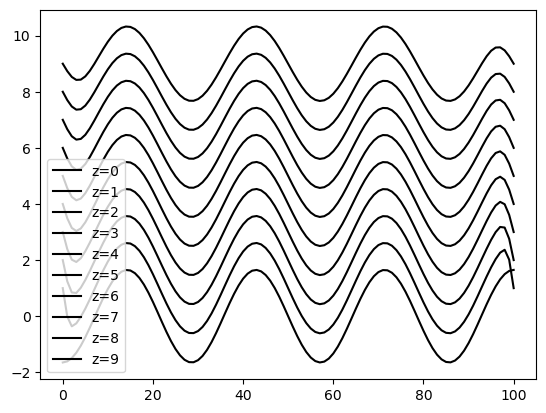

4.444444444444445e-07 0.23


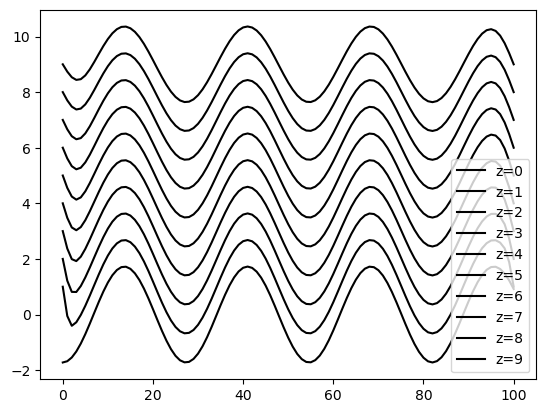

4.444444444444445e-07 0.24


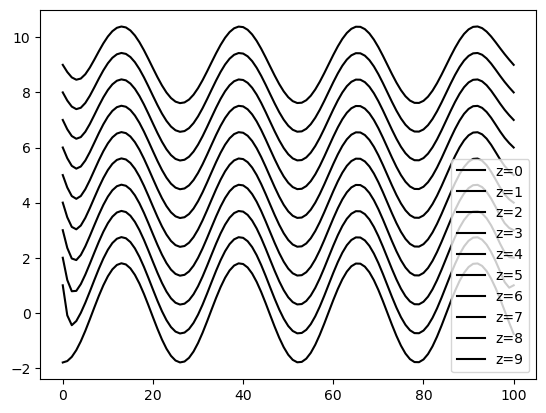

4.444444444444445e-07 0.25


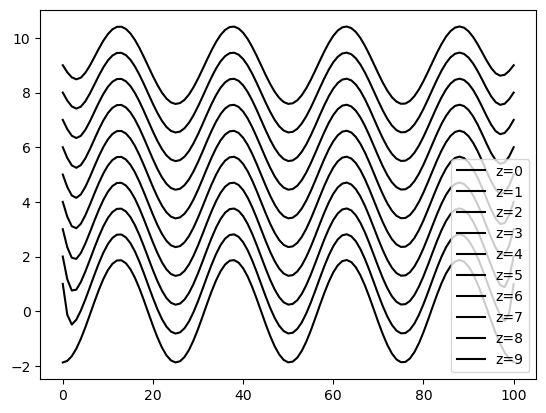

4.444444444444445e-07 0.26


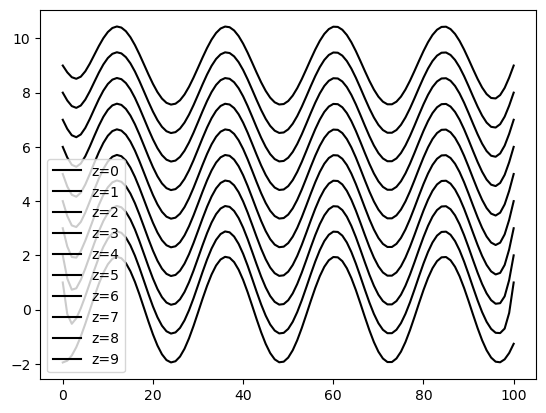

4.444444444444445e-07 0.27


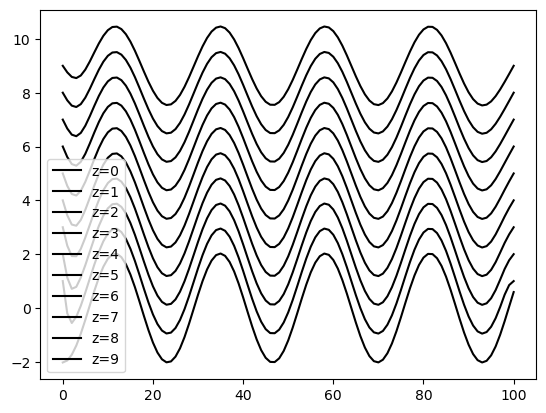

4.444444444444445e-07 0.28


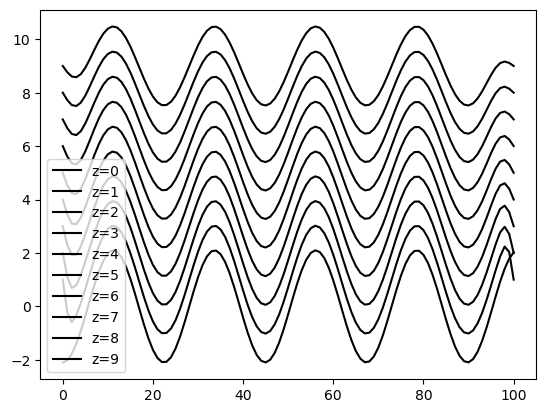

4.444444444444445e-07 0.29


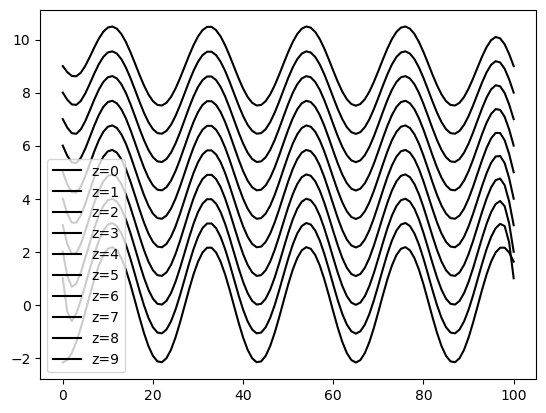

4.444444444444445e-07 0.3


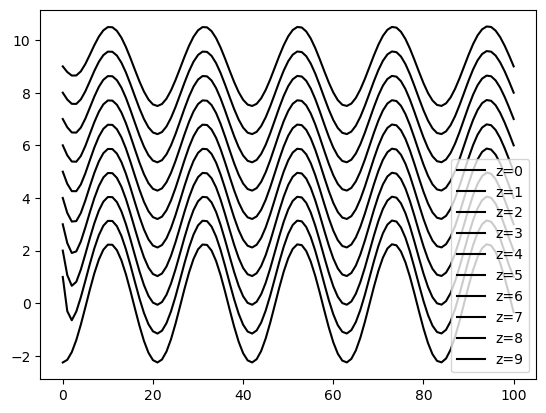

4.444444444444445e-07 0.31


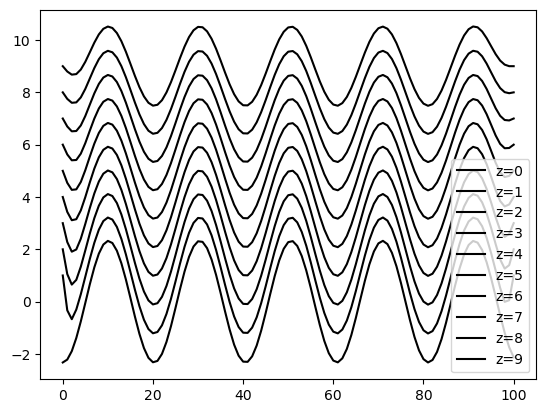

4.444444444444445e-07 0.32


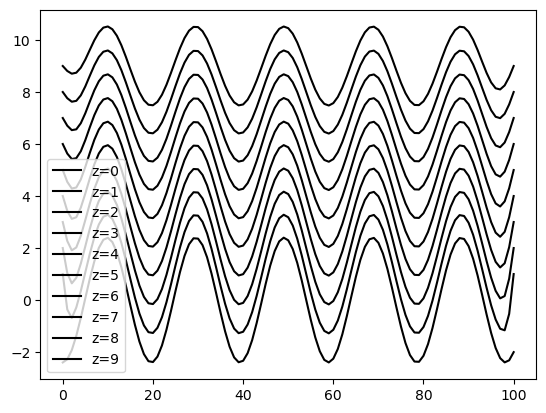

4.444444444444445e-07 0.33


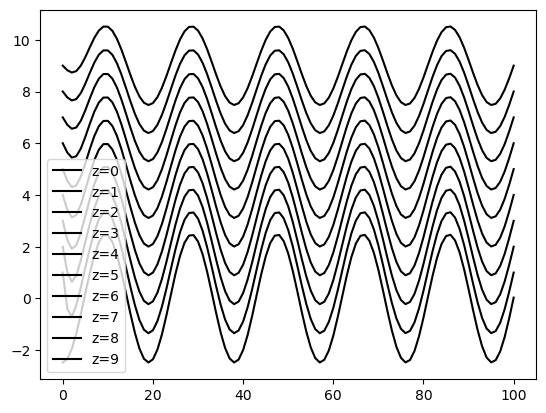

4.444444444444445e-07 0.34


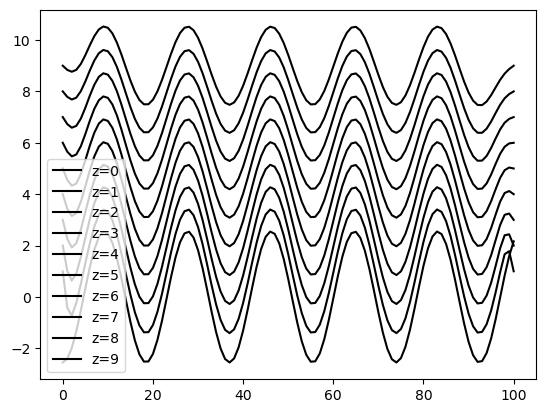

4.444444444444445e-07 0.35000000000000003


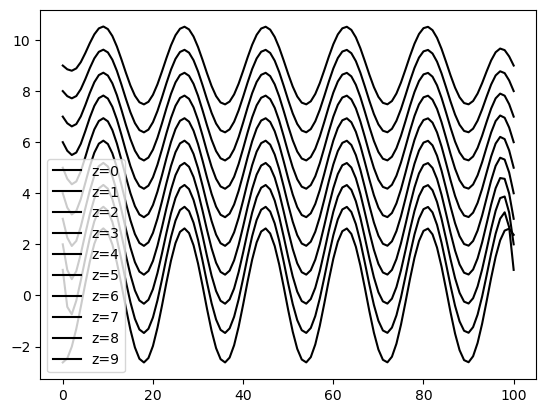

4.444444444444445e-07 0.36


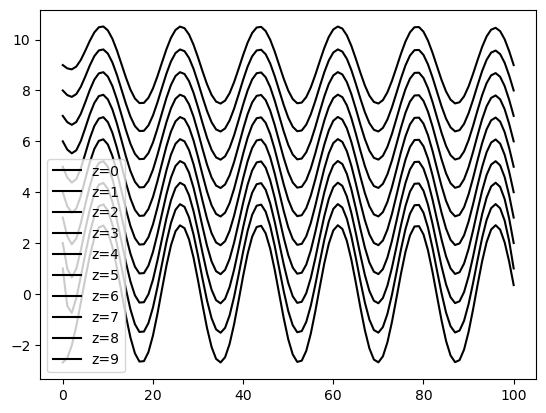

4.444444444444445e-07 0.37


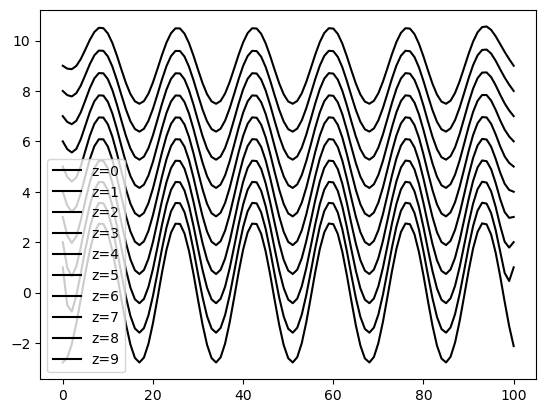

4.444444444444445e-07 0.38


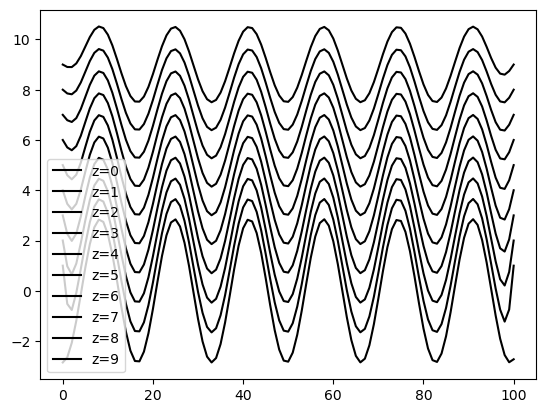

4.444444444444445e-07 0.39


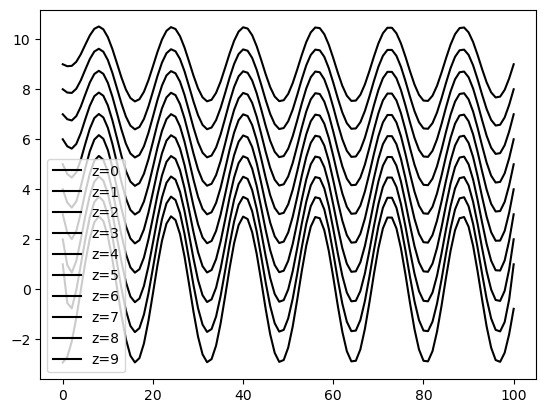

4.444444444444445e-07 0.4


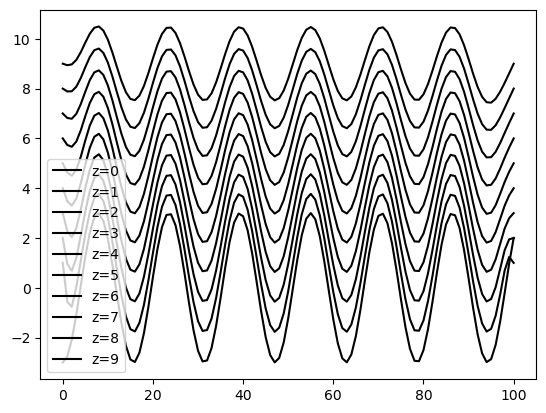

4.444444444444445e-07 0.41000000000000003


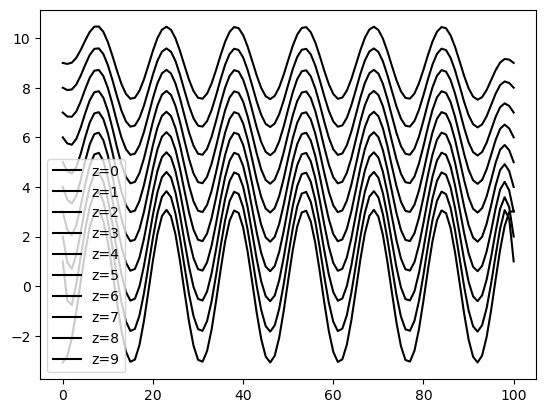

4.444444444444445e-07 0.42


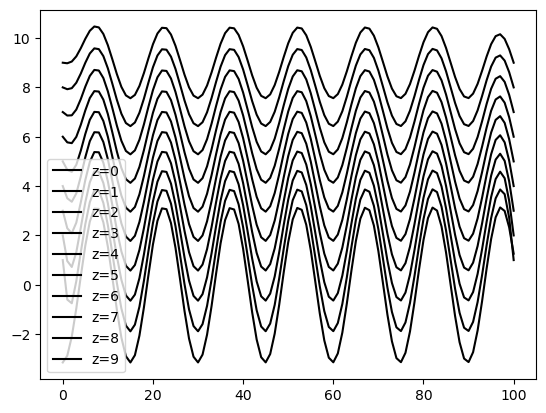

4.444444444444445e-07 0.43


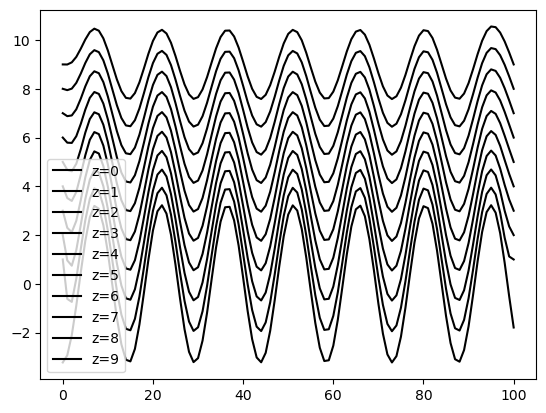

4.444444444444445e-07 0.44


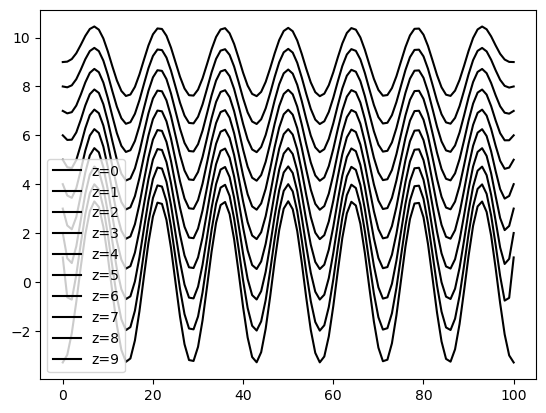

4.444444444444445e-07 0.45


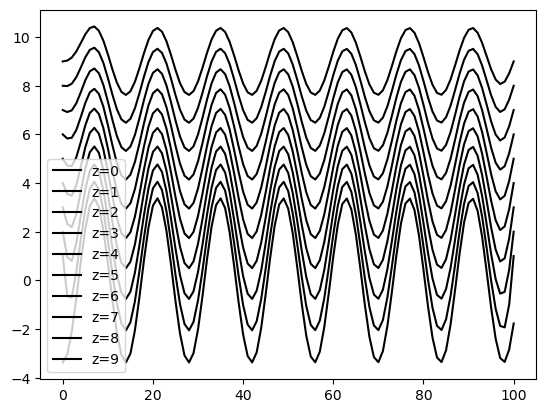

4.444444444444445e-07 0.46


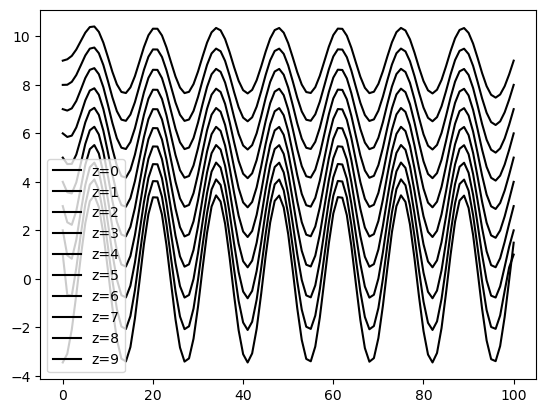

4.444444444444445e-07 0.47000000000000003


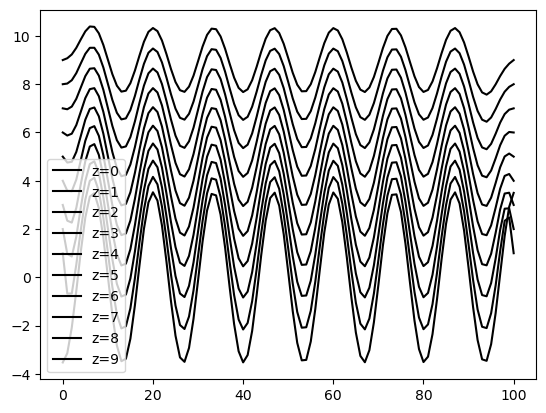

4.444444444444445e-07 0.48


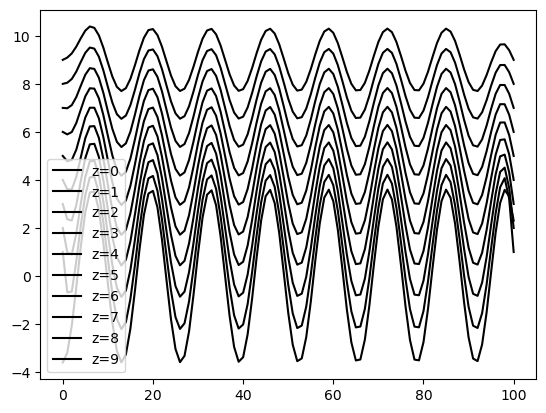

4.444444444444445e-07 0.49


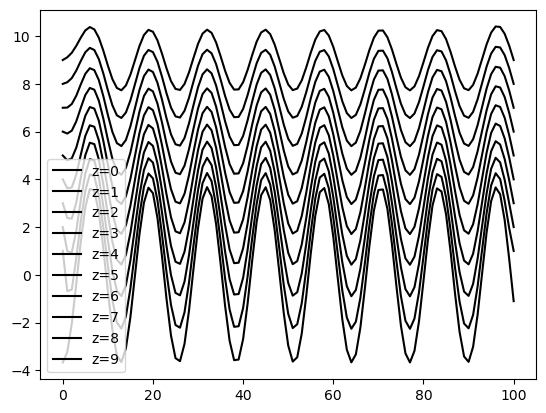

In [445]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt

# Parameters
dx = 1
xf = 100
x = np.arange(0, xf + dx, dx)

dz = 1
zf = 10
z = np.arange(0, zf + dz, dz)
n = len(z)

h0 = 0.5
k = 0.01
U = 15
N = 0.01
print(U*k, N)

klist = np.arange(0,1,0.01)

# currently this is set up to give me a ton of plots so I can experiment with the other values like U, N, and h0
for k in np.arange(0,50,1):
    k = klist[k]
    l2 = N**2 / U**2
    print(l2, k)

    # Initial and boundary conditions
    surfaceBC = (-U * h0 * k * np.cos(k * (x)) + z[0])
    #a = 10
    #surfaceBC = (h0*(a**2))/(x**2 + a**2)
    print
    topBC = np.zeros(len(x))

    w = np.zeros([n+1, len(x)])
    w[0, :] = surfaceBC
    w[-1, :] = topBC

    # Coefficient calculations
    alpha = dz**2 / (4 * dx**2)
    beta = dx**2 / (4 * dz**2)

    # Iterative solution using finite difference
    for i in range(1, n-1):
        A_coeff = [-alpha*np.ones(xf-1), 1 + (2*alpha) + l2, -alpha*np.ones(xf-1)]
        A = diags(A_coeff, [-1, 0, 1], shape=(xf-1, xf-1))

        B_coeff = [beta*np.ones(xf-1), 1 - (2*beta) - l2, beta*np.ones(xf-1)]
        B = diags(B_coeff, [-1, 0, 1], shape=(xf-1, xf-1))

        w[i, 1:xf] = np.linalg.solve(A.toarray(), np.dot(B.toarray(), w[i-1, 1:xf]))

    # Adding additional terms
    for e in range(0, zf):
        w[e, :] += z[e]

    # Plot the results
    for i in range(n-1):
        plt.plot(x, w[i, :], label=f'z={i}', color='black')

    plt.legend()
    plt.show()